In [1]:
import numpy as np
import matplotlib.pyplot as plt
#import pyfits
from astropy.io import fits
%matplotlib inline

Read in 9-D weights file from Paul Hewett.  Most of the information is contained in the first 3 weights.  So, some kind of projection to 2 or 3-D might be valuable.  See
![https://www.dropbox.com/s/vfn4qd2f2tdbsp1/W1W2W3.png?dl=0](https://www.dropbox.com/s/vfn4qd2f2tdbsp1/W1W2W3.png?dl=0)

In [2]:
hdulist = fits.open('./Hewett_090816_matchDR7all_wclusters_weightsonly.fits')
#print hdulist[1].data.tolist()
data = np.asarray(hdulist[1].data.tolist())
#X = data[:20000]
X = data
print X.shape
print X

(74686, 9)
[[  5.18906100e-02   3.41739800e-02   6.04148100e-02 ...,   1.23398900e-03
   -1.01078700e-02   8.28488600e-03]
 [  5.95085000e-02   2.72594600e-03   8.77810700e-02 ...,   1.15778500e-04
   -5.20728400e-03   1.24160800e-02]
 [  5.52844600e-02   4.67900300e-02   6.14540900e-02 ...,  -2.08211300e-02
    2.29287400e-05   8.59375800e-03]
 ..., 
 [  6.06351700e-02   1.95571500e-02   6.77929600e-02 ...,  -1.70952000e-02
    1.23167200e-02  -4.33174500e-03]
 [  4.83189500e-02   4.57525800e-02   4.55248000e-02 ...,   2.42748500e-03
   -1.02547600e-02   5.22462600e-03]
 [  4.28097800e-02   5.41749300e-02   3.43200300e-02 ...,  -1.22545600e-02
    8.32609400e-03   5.74094700e-03]]


In [3]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca.fit(X)
X_new = pca.transform(X)

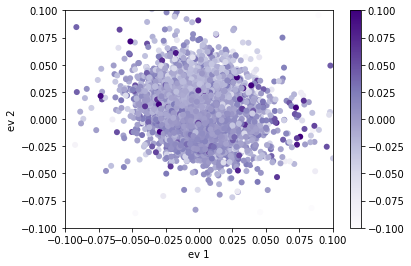

In [4]:
plt.scatter(X_new[:,0], X_new[:,1], c=X_new[:,2], cmap="Purples", edgecolor = "None")
plt.xlabel("ev 1")
plt.ylabel("ev 2")
plt.xlim(-0.1,0.1)
plt.ylim(-0.1,0.1)
plt.clim(-0.1,0.1)
plt.colorbar()

In [5]:
for num_feats in np.arange(1,10, dtype = int):
    pca = PCA(n_components=num_feats) # complete
    pca.fit(X)
    if (sum(pca.explained_variance_ratio_)>0.98):
            break
print("{:d} features are needed to explain 98% of the variance".format(num_feats))

6 features are needed to explain 98% of the variance


In [6]:
from sklearn.decomposition import FastICA
ica = FastICA(n_components=3)
ica.fit(X)
X_new = ica.transform(X)

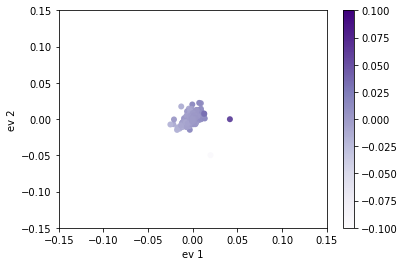

In [7]:
plt.scatter(X_new[:,0], X_new[:,1], c=X_new[:,2], cmap="Purples", edgecolor = "None")
plt.xlabel("ev 1")
plt.ylabel("ev 2")
plt.xlim(-0.15,0.15)
plt.ylim(-0.15,0.15)
plt.clim(-0.1,0.1)
plt.colorbar()

In [11]:
from sklearn.manifold import Isomap
k = 7 # Number of neighbors to use in fit
n = 3 # Number of dimensions to fit
iso = Isomap(k,n,path_method="D") # complete
iso.fit(X) # complete
X_new = iso.transform(X)# complete

MemoryError: 

In [ ]:
plt.scatter(X_new[:,0], X_new[:,1], c=X_new[:,2], cmap="Purples", edgecolor = "None") # complete
plt.xlim(-0.2,0.2)
plt.ylim(-0.2,0.2)
plt.clim(-0.1,0.1)
plt.colorbar()

In [ ]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components = 3, init='pca')
X_new = tsne.fit_transform(X)

In [ ]:
plt.scatter(X_new[:,0], X_new[:,1], c=X_new[:,2], cmap="Purples", edgecolor = "None") # complete # complete
plt.colorbar()

In [ ]:
#Run results from 2-D t-SNE through K-means
from sklearn.manifold import TSNE
tsne = TSNE(n_components = 2)
X_new = tsne.fit_transform(X)

Nclusters=3
from sklearn.cluster import KMeans
clf = KMeans(n_clusters=Nclusters)
clf.fit(X_new)
centers=clf.cluster_centers_
labels=clf.predict(X_new)

In [ ]:
H, xbins, ybins = np.histogram2d(X_new[:,0], X_new[:,1], 50)


plt.imshow(H.T, interpolation='nearest', aspect='auto', origin='lower',
          extent=[xbins[0], xbins[-1], ybins[0], ybins[-1]],cmap=plt.cm.binary)

plt.scatter(centers[:, 0], centers[:, 1], s=40, c='w', edgecolors='k')
#plt.xlim(-1,1)
#plt.ylim(-1,1)

xcenters = 0.5 * (xbins[1:] + ybins[:-1])
ycenters = 0.5 * (xbins[1:] + ybins[:-1])

Xgrid = np.meshgrid(xcenters, ycenters)
print Xgrid
Xgrid = np.array(Xgrid).reshape((2, 50 * 50)).T

H = clf.predict(Xgrid).reshape((50, 50))

for i in range(Nclusters):
    Hcp = H.copy()
    flag = (Hcp == i)
    Hcp[flag] = 1
    Hcp[~flag] = 0

    plt.contour(xcenters, ycenters, Hcp, [-0.5, 0.5], linewidths=1, colors='k')

In [ ]:
import sys
if sys.maxsize > 2**32:
    print('64-bit')
else:
    print('32-bit')